In [1]:
import scanpy as sc
import slalom as sl
from slalom.utils import plotTerms
import numpy as np
import h5py

In [2]:
adata = sc.read('mouse_retina_sbs.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 13478 × 4489 
    obs: 'cluster'
    uns: 'terms'
    varm: 'I'

In [5]:
fa = h5py.File('FA.hdf5')

In [6]:
list(fa.keys())

['F', 'I', 'W', 'X', 'Z', 'gene_ids', 'idx_genes', 'relevance', 'terms']

In [7]:
terms = fa['terms'][()]

In [8]:
to_plot = np.where(np.logical_or(terms == b'INFLAMMASOMES', terms == b'ASTROCYTES'))[0]

In [9]:
large_clusters = []
for cl in adata.obs['cluster']:
    if cl == 1: large_clusters.append('Horizontal cells')
    elif cl == 2: large_clusters.append('Retinal ganglion cells')
    elif cl >= 3 and cl <= 23: large_clusters.append('Amacrine cells')
    elif cl == 24: large_clusters.append('Rodes')
    elif cl == 25: large_clusters.append('Cones')
    elif cl >= 26 and cl <= 33: large_clusters.append('Bipolar cells')
    elif cl == 34: large_clusters.append('Muller glia')
    elif cl == 35: large_clusters.append('Astocytes')
    elif cl == 36: large_clusters.append('Fibroblasts')
    elif cl == 37: large_clusters.append('Vascular endothelium')
    elif cl == 38: large_clusters.append('Perioytes')
    elif cl == 39: large_clusters.append('Microglia')

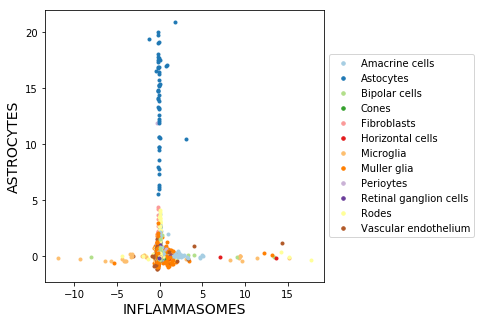

In [10]:
fg = sl.plotFactors(terms=['INFLAMMASOMES', 'ASTROCYTES'], X=fa['X'][:, to_plot], lab=large_clusters, isCont=False)

In [11]:
fg.set_size_inches(10, 10)

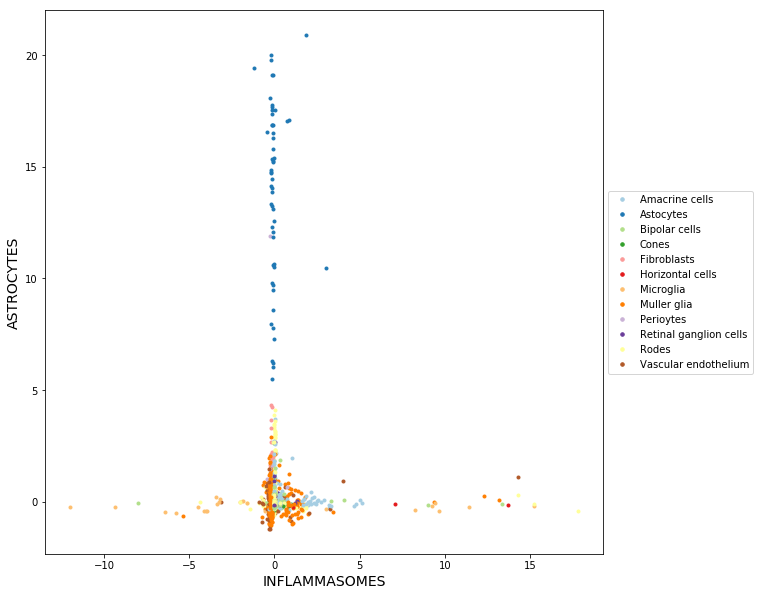

In [12]:
fg

In [33]:
alpha = fa['relevance'][()]
top = np.argsort(-alpha)[:20]
alpha = alpha[top]
S = fa['X'][()][:, top]
top_terms = terms[top]

In [35]:
alpha

array([0.04616505, 0.03478013, 0.03165339, 0.02274915, 0.02138929,
       0.02000622, 0.01206114, 0.01081548, 0.00945458, 0.00911357,
       0.00908881, 0.00845452, 0.00498035, 0.00399877, 0.00375599,
       0.00319024, 0.00310271, 0.0022024 , 0.00215345, 0.0021144 ])

In [36]:
top_terms

array([b'SIGNALING_BY_GPCR', b'TRIF_MEDIATED_TLR3_SIGNALING',
       b'METABOLISM_OF_VITAMINS_AND_COF',
       b'NEUROTRANSMITTER_RECEPTOR_BIND',
       b'TRANSMISSION_ACROSS_CHEMICAL_S', b'GPCR_DOWNSTREAM_SIGNALING',
       b'hidden0', b'TRANSMEMBRANE_TRANSPORT_OF_SMA',
       b'GASTRIN_CREB_SIGNALLING_PATHWA', b'ASTROCYTES',
       b'NEURONAL_SYSTEM', b'DEVELOPMENTAL_BIOLOGY',
       b'G_ALPHA_Q_SIGNALLING_EVENTS', b'SLC_MEDIATED_TRANSMEMBRANE_TRA',
       b'SIGNALING_BY_NOTCH', b'CELL_CYCLE',
       b'TRANSPORT_OF_INORGANIC_CATIONS', b'HIV_INFECTION',
       b'GPCR_LIGAND_BINDING', b'ADAPTIVE_IMMUNE_SYSTEM'], dtype='|S30')